## Data Augmentation using Keras

##### See Lib\site-packages\keras_preprocessing\image.py for implementation details

In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [3]:
# Function for visualization
def visualize_generator(generator):
    xs = generator.next()
    for xid, x in enumerate(xs):
        plt.subplot(1, xs.shape[0], xid + 1)
        plt.imshow(x.astype(np.uint8))
        plt.axis('off')

In [4]:
# Parameter -- ImageDataGenerator
batch_size = 8

In [5]:
# Create image for visualization
img = np.ones((31, 31, 3), dtype=np.uint8) * 255
img[16, :, 0], img[16, :, 1], img[16, :, 2] = 0, 0, 0
img[:, 16, 0], img[:, 16, 1], img[:, 16, 2] = 0, 0, 0

img[8, :, 0], img[8, :, 1], img[8, :, 2] = 255, 0, 0
img[:, 8, 0], img[:, 8, 1], img[:, 8, 2] = 255, 0, 0

img[24, :, 0], img[24, :, 1], img[24, :, 2] = 0, 255, 0
img[:, 24, 0], img[:, 24, 1], img[:, 24, 2] = 0, 255, 0

img[9:24, 9:24, 0], img[9:24, 9:24, 1], img[9:24, 9:24, 2] = 100, 100, 200
imgs = np.array([img for ind in range(batch_size)])

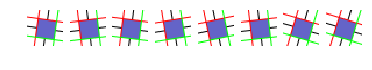

In [6]:
# Check Rotation (Value -- 0 ~ 180 degree)
datagen = ImageDataGenerator(rotation_range=20)
generator = datagen.flow(imgs, batch_size=batch_size)
visualize_generator(generator)

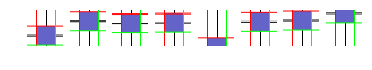

In [7]:
# Check Shift (Value : 0 ~ <1 ==> Maximum shift pixels = IM_W / IM_H * value)
datagen = ImageDataGenerator(width_shift_range=0, height_shift_range=0.5)
generator = datagen.flow(imgs, batch_size=batch_size)
visualize_generator(generator)

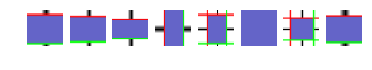

In [8]:
# Check Zoom (Floating -- [1 - zoom_range, 1 + zoom_range], List)
#            (<1 : Zoom in. >1 : Zoom out)
#            (Zoom for X, Y direction are different values)
datagen = ImageDataGenerator(zoom_range=[0.1, 1])
generator = datagen.flow(imgs, batch_size=batch_size)
visualize_generator(generator)

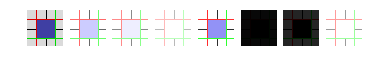

In [9]:
# Check Channel Shift (Float value. Apply offset (-Value ~ Value) on all channels)
#                     (Can't apply channel dependent offset)
datagen = ImageDataGenerator(channel_shift_range=255)
generator = datagen.flow(imgs, batch_size=batch_size)
visualize_generator(generator)

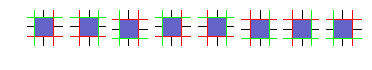

In [10]:
# Check Flip/Mirror
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
generator = datagen.flow(imgs, batch_size=batch_size)
visualize_generator(generator)

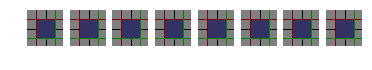

In [11]:
# Check Preprocessing function (Applied after augmentation)
def preprocess(img):
    return img * 0.5

datagen = ImageDataGenerator(preprocessing_function=preprocess)
generator = datagen.flow(imgs, batch_size=batch_size)
visualize_generator(generator)